# 1. 라이브러리 및 데이터

In [14]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import lightgbm as lgb

In [16]:
train = pd.read_csv("movies_train.csv")
test = pd.read_csv("movies_test.csv")
submission = pd.read_csv("submission.csv")

In [17]:
train.head(100)

title   distributor  genre release_time  time screening_rat director  \
0      개들의 전쟁      롯데엔터테인먼트     액션   2012-11-22    96      청소년 관람불가      조병옥   
1        내부자들        (주)쇼박스    느와르   2015-11-19   130      청소년 관람불가      우민호   
2   은밀하게 위대하게        (주)쇼박스     액션   2013-06-05   123       15세 관람가      장철수   
3    나는 공무원이다        (주)NEW    코미디   2012-07-12   101        전체 관람가      구자홍   
4        불량남녀  쇼박스(주)미디어플렉스    코미디   2010-11-04   108       15세 관람가      신근호   
..        ...           ...    ...          ...   ...           ...      ...   
95         경복     KT&G 상상마당    드라마   2013-07-11    69       15세 관람가      최시형   
96        잉투기         무비꼴라쥬     액션   2013-11-14    98       15세 관람가      엄태화   
97        사이비           NEW  애니메이션   2013-11-21   100      청소년 관람불가      연상호   
98     두 개의 달      롯데엔터테인먼트   미스터리   2012-07-12    86       15세 관람가      김동빈   
99   신이 보낸 사람     (주)마운틴픽쳐스    드라마   2014-02-13   112       15세 관람가      김진무   

    dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  
0              NaN             0         91          2        23398  
1       1161602.50             2        387          3      7072501  
2        220775.25             4        343          4      6959083  
3         23894.00             2         20          6       217866  
4             1.00             1        251          2       483387  
..             ...           ...        ...        ...          ...  
95             NaN             0         17          2          651  
96             NaN             0         65          3        17341  
97             NaN             0        136          4        22525  
98          321.00             1        167          4       426706  
99             NaN             0        138          1       424778  

[100 rows x 12 columns]

### 컬럼 설명
  
  title : 영화의 제목
  
  distributor : 배급사
  
  genre : 장르
  
  release_time : 개봉일
  
  time : 상영시간(분)
  
  screening_rat : 상영등급
  
  director : 감독이름
  
  dir_prev_bfnum : 해당 감독의 전에 만든 영화의 평균 관객수 (단 관객수가 알려지지 않은 영화 제외)
  
  dir_prev_num : 해당 감독이 전에 만든 영화의 개수 (단 관객수가 알려지지 않은 영화 제외)
  
  num_staff : 스텝수
  
  num_actor : 주연배우수
  
  box_off_num : 관객수

In [18]:
print(train.shape)
print(test.shape)
print(submission.shape)


(600, 12)
(243, 11)
(243, 2)


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


 7번 컬럼 (dir_prev_bfnum)에 결측값 확인

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


7번 컬럼에(dir_prev_bfnum) 결측값 확인

### 결측값 채워주기
7번 컬럼은 dir_prev_bfnum : 해당 감독의 전에 만든 영화의 평균 관객수 (단 관객수가 알려지지 않은 영화 제외)입니다.

그래서 저는 해당 감독의 평균 dir_prev_num을 구해서 해당 컬럼에 넣어줄 것입니다.

In [21]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [22]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [23]:
# train["director"].fillna(train.groupby("director")["dir_prev_bfnum"].transform("mean")

# 작업이 오류가 나왔다. 이는 중복되는 감독이 없다고  판단하였고, 다른 방법으로 결측값 처리를 해야한다고 판단했다.

In [24]:
train.describe()

time  dir_prev_bfnum  dir_prev_num   num_staff   num_actor  \
count  600.000000    2.700000e+02    600.000000  600.000000  600.000000   
mean   100.863333    1.050443e+06      0.876667  151.118333    3.706667   
std     18.097528    1.791408e+06      1.183409  165.654671    2.446889   
min     45.000000    1.000000e+00      0.000000    0.000000    0.000000   
25%     89.000000    2.038000e+04      0.000000   17.000000    2.000000   
50%    100.000000    4.784236e+05      0.000000   82.500000    3.000000   
75%    114.000000    1.286569e+06      2.000000  264.000000    4.000000   
max    180.000000    1.761531e+07      5.000000  869.000000   25.000000   

        box_off_num  
count  6.000000e+02  
mean   7.081818e+05  
std    1.828006e+06  
min    1.000000e+00  
25%    1.297250e+03  
50%    1.259100e+04  
75%    4.798868e+05  
max    1.426277e+07

In [25]:
train[["genre", "box_off_num"]].groupby("genre").mean().sort_values("box_off_num")

box_off_num
genre               
뮤지컬     6.627000e+03
다큐멘터리   6.717226e+04
서스펜스    8.261100e+04
애니메이션   1.819267e+05
멜로/로맨스  4.259680e+05
미스터리    5.275482e+05
공포      5.908325e+05
드라마     6.256898e+05
코미디     1.193914e+06
SF      1.788346e+06
액션      2.203974e+06
느와르     2.263695e+06

In [26]:
train[["director", "dir_prev_bfnum"]].groupby("director").mean().sort_values("dir_prev_bfnum")

dir_prev_bfnum
director                
신근호                  1.0
이성은                  7.0
정용주                  8.0
주경중                 17.0
배형준                 19.0
...                  ...
홍재희                  NaN
황병국                  NaN
황석호                  NaN
황욱                   NaN
황철민                  NaN

[472 rows x 1 columns]

In [27]:
train[["director", "box_off_num"]].groupby("director").mean().sort_values("box_off_num")

box_off_num
director             
노성수               1.0
김정호               2.0
고구마               8.0
이세일              10.0
진광교              36.0
...               ...
한재림         9135806.0
봉준호         9350351.0
양우석        11374879.0
최동훈        12845252.0
윤제균        14262766.0

[472 rows x 1 columns]

In [28]:
train.corr()

time  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  \
time            1.000000        0.264675      0.306727   0.623205   0.114153   
dir_prev_bfnum  0.264675        1.000000      0.131822   0.323521   0.083818   
dir_prev_num    0.306727        0.131822      1.000000   0.450706   0.014006   
num_staff       0.623205        0.323521      0.450706   1.000000   0.077871   
num_actor       0.114153        0.083818      0.014006   0.077871   1.000000   
box_off_num     0.441452        0.283184      0.259674   0.544265   0.111179   

                box_off_num  
time               0.441452  
dir_prev_bfnum     0.283184  
dir_prev_num       0.259674  
num_staff          0.544265  
num_actor          0.111179  
box_off_num        1.000000

<AxesSubplot:>

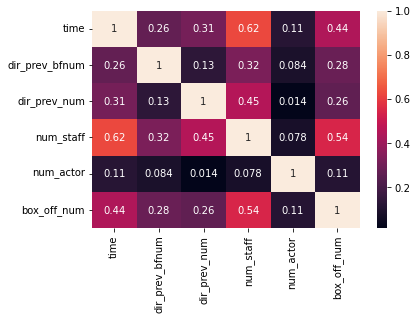

In [29]:
import seaborn as sns
sns.heatmap(train.corr(), annot = True)

## 3 .데이터 전처리


In [30]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [31]:
train[train["dir_prev_bfnum"].isna()]["dir_prev_num"].sum()  

0

dir_prev_bfnum이 결측치인 값들의 dir_prev_num의 합은 모두 0이다.
이 의미는 감독이 전에 만든 영화의 평균관객수가 결측치로 되어있는 값인 이유는,
감독이 전에 참여한 영화가 0 즉 없다는 의미이다.

test 데이터도 마찬가지이다.

In [32]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [33]:
train[train["dir_prev_bfnum"].isna()] #실제로 확인해보면 전에 참여한 영화는 없고 전에 참여한 영화의 평균관람객은 결측치로 되어있다.

title      distributor   genre release_time  time  \
0             개들의 전쟁         롯데엔터테인먼트      액션   2012-11-22    96   
6               길위에서             백두대간   다큐멘터리   2013-05-23   104   
8    1789, 바스티유의 연인들  유니버설픽쳐스인터내셔널코리아     뮤지컬   2014-09-18   129   
9              청춘그루브           (주)두타연     드라마   2012-03-15    94   
10            AV 아이돌        (주) 케이알씨지  멜로/로맨스   2015-07-27    89   
..               ...              ...     ...          ...   ...   
593       낭만파 남편의 편지             퍼스트런    미스터리   2013-09-12    97   
594         오빠가 돌아왔다        (주)마운틴픽쳐스     코미디   2014-03-20    94   
597            살인의 강        (주)마운틴픽쳐스      공포   2010-09-30    99   
598           악의 연대기        CJ 엔터테인먼트     느와르   2015-05-14   102   
599              베를린        CJ 엔터테인먼트      액션   2013-01-30   120   

    screening_rat director  dir_prev_bfnum  dir_prev_num  num_staff  \
0        청소년 관람불가      조병옥             NaN             0         91   
6          전체 관람가      이창재             NaN             0         32   
8          전체 관람가      정성복             NaN             0          3   
9         15세 관람가      변성현             NaN             0        138   
10       청소년 관람불가   조조 히데오             NaN             0          0   
..            ...      ...             ...           ...        ...   
593      청소년 관람불가      최위안             NaN             0          5   
594      청소년 관람불가      노진수             NaN             0         37   
597      청소년 관람불가      김대현             NaN             0        123   
598       15세 관람가      백운학             NaN             0        431   
599       15세 관람가      류승완             NaN             0        363   

     num_actor  box_off_num  
0            2        23398  
6            5        53526  
8            5         4778  
9            3          868  
10           4          745  
..         ...          ...  
593          3         1132  
594          5         1958  
597          4         2475  
598          4      2192525  
599          5      7166532  

[330 rows x 12 columns]

In [34]:
train["dir_prev_bfnum"].fillna(0 , inplace=True)

In [35]:
test["dir_prev_bfnum"].fillna(0 , inplace=True)

In [36]:
train.isna().sum()  #결측치가 모두 제거된것을 확인할 수 있다.

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

## 4. 변수 선택 및 모델 구축

수치형 변수들만 선택

x -> MODEL -> y(영화 관객 수)


  
  random_state 는 어떤 컴퓨터에서나 같은 값이 나오도록 하기 위해 고정시켜놓는것  


In [37]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000) #
# n_estimators ( int , optional ( default = 100 ) ) – 맞추기 위해 부스트 된 트리 수  
# random_state 정수값을 입력하면 숫자를 random하게 생성할때 사용되는 seed숫자입니다

In [38]:
features = ["time", "dir_prev_num", "num_staff", "num_actor"]
target = ["box_off_num"]

In [39]:
X_train = train[features]
Y_train = train[target]
X_test = test[features]

In [40]:
X_train.shape

(600, 4)

## 5. 모델 학습 및 검증

### LightGBM  
부스팅 모델  
기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습을 이어나가게 함

### 순서  
1)lightgbm(base model)  
2)k-fold ligntgbm(k-fold model)  
3)feature engineering(fe)  
4)grid search (hyperparameter tuning)

In [41]:
model.fit(X_train, Y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [42]:
singleLGBM = submission.copy()

In [43]:
singleLGBM.head()

title  box_off_num
0       용서는 없다            0
1  아빠가 여자를 좋아해            0
2          하모니            0
3          의형제            0
4        평행 이론            0

In [44]:
singleLGBM["box_off_num"] = model.predict(X_test)

In [45]:
singleLGBM.to_csv("singleLGBM.csv", index= False)

In [46]:
singleLGBM.head() #모델의 성능이 좋지 않다. 관객수에 음수가 있기 때문

title   box_off_num
0       용서는 없다  2.817995e+06
1  아빠가 여자를 좋아해  3.753772e+05
2          하모니 -5.693243e+05
3          의형제  1.581189e+06
4        평행 이론 -5.277806e+05

### k-fold 교차검증
과대적합 방지
  
  모델 간 일반적인 성능 비교

In [47]:
from sklearn.model_selection import KFold

n_splits 5등분 , shuffle 순서를 섞는다(순서의 영향을 없애기 위해), random_state 무작위로 섞는 과정이 모든 컴퓨터에서 동일하게 적용되기 위해

In [48]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state = 777) 

In [49]:
# 600개에서 4:1의 비율로 train / test로 나누어짐
for train_idx, val_idx in k_fold.split(X_train):
    print(len(train_idx), len(val_idx))
    break

480 120


eval_set 평가기준/ early_stopping_rounds 어느 정도 시점이 되면 학습을 중단시켜주는것, 100번의 과정동안 더이상 유의미한 모델의 성능 증가(오차율)가 되지 않는다면 중지/ verbose 100번째 모델마다 출력값 산출

In [50]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators=1000)
models = [ ]
for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

[100]	valid_0's l2: 2.70572e+12
[100]	valid_0's l2: 3.90847e+12
[100]	valid_0's l2: 3.50344e+12


C:\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 1.45977e+12
[100]	valid_0's l2: 1.77214e+12


In [51]:
models

[LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777)]

In [52]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [53]:
kfoldLightGBM = submission.copy()

In [54]:
preds

[array([3367422.08211024,  961138.88337016, 1097929.67851313,
        2097270.81999921,  781476.31131047,  123133.23396977,
          84085.01896248,  199222.92670303,  124854.97973097,
        1072684.78820647,  657040.55769984, 1644701.47160779,
         924735.72080619,  191699.58415836,  723218.39948755,
        2395613.42888462,  113180.54906592, 1882765.92812296,
          97286.47282983,  417270.42113431,  161482.3367577 ,
          63495.73363115,  598057.42337284,  249411.25868881,
         308424.71884273, 1319518.60852241,  202273.52740684,
        1076683.13768137,  491636.41945325,  183406.6380314 ,
        1740233.45816734,   86696.17528125,  440430.29773088,
        2040944.13061099,  113375.45695331,  531746.29484356,
         106207.35971699,  169560.79581187,  158101.0895316 ,
          95037.29701059,  466355.50624629,  197548.63265325,
         198810.0901353 ,  682743.4340129 ,  679265.22397749,
         617812.91125278,  219182.85833837,   83712.10602149,
        

In [55]:
import numpy as np

In [56]:
kfoldLightGBM["box_off_num"] = np.mean(preds, axis = 0) 

In [57]:
kfoldLightGBM.head()

title   box_off_num
0       용서는 없다  3.367422e+06
1  아빠가 여자를 좋아해  9.611389e+05
2          하모니  1.097930e+06
3          의형제  2.097271e+06
4        평행 이론  7.814763e+05

In [58]:
kfoldLightGBM.to_csv("kfoldLightGBM.csv", index=False)

### feature engineering

In [59]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [60]:
train.genre

0       액션
1      느와르
2       액션
3      코미디
4      코미디
      ... 
595    드라마
596    드라마
597     공포
598    느와르
599     액션
Name: genre, Length: 600, dtype: object

In [61]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()  #문자열 값을 전부 숫자로 변경해주는것
train["genre"] = le.fit_transform(train["genre"]) #변경해주는것 학습

In [62]:
train.genre  #장르 값들이 숫자로 변경

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int32

In [63]:
test.genre

0         느와르
1      멜로/로맨스
2         드라마
3          액션
4          공포
        ...  
238       드라마
239     다큐멘터리
240       느와르
241       드라마
242    멜로/로맨스
Name: genre, Length: 243, dtype: object

In [64]:
test["genre"] = le.fit_transform(test["genre"])

In [65]:
features = ["time", "dir_prev_num", "num_staff", "num_actor", "dir_prev_bfnum","genre"]

In [66]:
X_train = train[features]
Y_train = train[target]
X_test = test[features]

In [67]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators=1000)

models = [ ]

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

C:\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.62067e+12
[100]	valid_0's l2: 4.39227e+12
[100]	valid_0's l2: 3.29841e+12
[100]	valid_0's l2: 1.56499e+12
[100]	valid_0's l2: 1.60118e+12


In [68]:
X_test.head()

time  dir_prev_num  num_staff  num_actor  dir_prev_bfnum  genre
0   125             2        304          3    3.005290e+05      2
1   113             4        275          3    3.427002e+05      5
2   115             3        419          7    4.206611e+06      4
3   116             2        408          2    6.913420e+05     10
4   110             1        380          1    3.173800e+04      1

In [69]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [70]:
feLightGBM = submission.copy()

In [71]:
feLightGBM["box_off_num"] = np.mean(preds, axis = 0)

In [72]:
feLightGBM.to_csv("feLightGBM.csv", index=False)